# <font color = lightcoral>Inference Testing
>    
### <font color = red> Non-Overlapping Windows

> From transformer models
>

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [2]:
import pandas as pd
import numpy as np
import time

data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'

################################## Part 1: Parsed Raw File ###################################

print("\n" + "*"*100)
print("********************** Part 1: Parsed Raw File ******************************************")
print("*"*100 + "\n")

parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
parsed_file_df = pd.read_csv(parsed_file)
display(parsed_file_df.head())
print("Shape of Parsed Raw File:", parsed_file_df.shape)

######################### Part 2: Encoded File with Feature for Model Training ######################

print("\n" + "*"*100)
print("********************** Part 2: Input Data with Features ******************************************")
print("*"*100 + "\n")

encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
display(encoded_feature_input_file_df.iloc[:, :25].head())
print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

######################### Part 3: Encoded File where Train_Test = Test ###############################

print("\n" + "*"*100)
print("********************** Part 3: Encoded File where Train_Test = Test *******************************")
print("*"*100 + "\n")

encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
display(encoded_feature_input_test_df.iloc[:, :25].head(10))
print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

######################### Part 4: Event_ID to Template Mapping #######################################

print("\n" + "*"*100)
print("********************** Part 4: Event_ID to Template Mapping ******************************************")
print("*"*100 + "\n")

eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
eventid_template_df = pd.read_csv(eventid_template_file)
display(eventid_template_df.head())
print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

######################### Part 5: Event_ID to Encoding Mapping #######################################

print("\n" + "*"*100)
print("********************** Part 5: Event_ID to Encoding Mapping ******************************************")
print("*"*100 + "\n")

eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
eventid_encoding_df = pd.read_csv(eventid_encoding_file)
display(eventid_encoding_df.head())
print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

######################### Part 6: First Two Records from X_test and y_test #######################

print("\n" + "*"*100)
print("********************** Part 6: First Two Records from X_test and y_test *****************************")
print("*"*100 + "\n")

file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# Convert the first two records to DataFrames for better display
X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# Display the first two records
print("First two records from X_test:")
display(X_test_first_two)

print("\nFirst two records from y_test:")
display(y_test_first_two)


****************************************************************************************************
********************** Part 1: Parsed Raw File ******************************************
****************************************************************************************************



,LineId,Label,Id,Date,Code1,Time,Code2,Component1,Component2,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected


Shape of Parsed Raw File: (4713493, 13)

****************************************************************************************************
********************** Part 2: Input Data with Features ******************************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
0,0,Train,2005-06-03 16:00:00,0,0,6,228,6,0.171708,16,4,465,35431,913.0,0.012903,0,0.000000,0.171708,4895.0,18.0,228,228,228,228,228
1,1,Train,2005-06-03 16:05:00,1,0,2,987,2,0.598270,16,4,7,35433,465.0,0.285714,0,0.171708,0.426562,4257.0,19.0,729,987,987,987,987
2,2,Train,2005-06-03 16:10:00,2,0,6,399,18,0.655243,16,4,81,35431,7.0,0.222222,0,0.598270,0.056973,2756.0,23.0,734,430,504,95,95
3,3,Train,2005-06-03 16:15:00,3,0,5,328,6,1.039660,16,4,66,35431,81.0,0.090909,0,0.655243,0.384418,1532.0,25.0,987,987,987,987,328
4,4,Train,2005-06-03 16:25:00,5,0,4,399,3,0.895333,16,4,14,35433,66.0,0.214286,0,1.039660,-0.144328,633.0,28.0,95,504,504,399,399


Shape of Encoded File with Features: (14537, 35453)

****************************************************************************************************
********************** Part 3: Encoded File where Train_Test = Test *******************************
****************************************************************************************************



,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count,EventId_1,EventId_2,EventId_3,EventId_4,EventId_5
11615,11615,Test,2005-11-08 16:10:00,45506,0,1,68,0,0.000000,16,1,1,35433,8.0,0.000000,0,0.000000,0.000000,26.0,10.0,68,0,0,0,0
11616,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.600000,1,0.000000,1.251989,33.0,13.0,95,399,399,95,95
11617,11617,Test,2005-11-08 16:55:00,45515,0,1,176,0,0.000000,16,1,1,35433,15.0,0.000000,0,1.251989,-1.251989,26.0,13.0,176,0,0,0,0
11618,11618,Test,2005-11-08 17:25:00,45521,1,2,74,1,0.693147,17,1,1024,35433,1.0,0.000977,0,0.000000,0.693147,1049.0,14.0,74,74,74,74,74
11619,11619,Test,2005-11-08 17:30:00,45522,0,1,176,0,0.000000,17,1,1,35433,1024.0,0.000000,0,0.693147,-0.693147,1042.0,14.0,176,0,0,0,0


Shape of Encoded File where Train_Test = Test: (2922, 35453)

****************************************************************************************************
********************** Part 4: Event_ID to Template Mapping ******************************************
****************************************************************************************************



,EventId,EventTemplate,Occurrences
0,3aa50e45,instruction cache parity error corrected,105924
1,b9250ad9,MidplaneSwitchController performing bit sparing on R<*>-M<*>-L<*>-U<*>-C bit <*>,964
2,fc5f0940,generating core.<*>,1706751
3,1840cbfe,"<*> ddr errors(s) detected and corrected on rank <*>, symbol <*>, bit <*>",33939
4,828a502b,<*> <*> <*> error(s) (dcr <*>) detected and corrected,5040


Shape of Event_ID to Template Mapping: (1000, 3)

****************************************************************************************************
********************** Part 5: Event_ID to Encoding Mapping ******************************************
****************************************************************************************************



,EventId,EncodedValue
0,0025df56,0
1,0045c3a8,1
2,004a68ba,2
3,00980b01,3
4,00d49120,4


Shape of Event_ID to Encoding Mapping: (1000, 2)

****************************************************************************************************
********************** Part 6: First Two Records from X_test and y_test *****************************
****************************************************************************************************

First two records from X_test:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,45510.0,-0.364160,11.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.200941,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.257510,-0.659998,-2047.870864,862.787984,-534.718270,440.094515,-283.303228,-161.234216,349.471686,29.455197,-136.915977,-212.025750,-60.999929,237.803726,32.777915,21.176680,-114.194870,148.200624,-19.540514,-63.003840,41.384577,80.036103,22.008479,109.725264,-94.333692,37.236123,-19.997967,58.240053,-54.420031,54.705458,-70.859203,-13.074278,1.860684,-7.516986,70.509727,-135.882827,-93.451614,-36.512232,-20.111325,-60.338670,-76.343065,27.656285
1,45514.0,0.104469,80.0,-0.057064,1.006346,0.596130,-0.952078,-0.196450,0.051642,-0.205392,1.022858,1.732448,-0.866508,1.625772e+00,-0.256379,-0.490115,-2048.817332,863.891268,-535.619773,440.995019,-283.801159,-161.953330,351.093142,29.823787,-137.348242,-212.285406,-60.799247,239.860088,34.062508,21.861439,-113.887760,150.439903,-18.753106,-64.995829,42.856527,81.853350,21.908611,111.426033,-99.750063,42.373495,-20.631142,59.781529,-56.650289,53.382343,-71.627494,-14.530250,1.451952,-5.405249,79.218541,-152.468812,-120.039977,-74.278016,-26.132495,-103.639051,-136.116477,16.057502
2,45519.0,-0.364160,41.0,-0.072711,-0.866508,0.596130,-0.952078,-0.205353,0.051642,-0.196489,-0.854291,-0.577218,1.006346,-1.625772e+00,-0.257510,-0.490115,-2043.764103,857.409369,-529.296502,433.276907,-278.787281,-154.618847,333.713196,25.098934,-126.876196,-194.748810,-54.946318,193.178934,23.533150,15.032858,-88.857854,96.529464,-16.293820,-33.666993,20.822308,40.115838,11.166104,44.429169,-28.399684,4.231447,-5.164654,15.161668,-15.972033,6.244275,-16.403934,-8.823143,-5.209376,4.025342,-3.344977,13.722684,2.859107,-85.908346,14.066307,-64.900077,-105.809419,-64.690254
3,45525.0,-0.207950,13.0,-0.070972,0.170372,0.751345,-0.952078,0.445165,0.051642,-0.205392,-0.851236,-0.577218,-0.866508,9.000867e-01,-0.092292,-0.433488,-2048.155512,863.054993,-534.836536,440.025630,-283.205549,-160.991849,348.822534,29.126211,-135.960681,-209.921101,-60.004484,233.327260,32.627742,20.941631,-110.402720,142.812040,-18.402857,-60.521493,39.684404,75.819158,20.292867,101.512429,-89.229645,36.778951,-18.289753,53.133180,-50.735711,46.003461,-63.341987,-13.895835,0.227459,-3.729078,66.649256,-126.881492,-101.314007,-78.767558,-19.278165,-99.175034,-133.799944,1.499291
4,45526.0,-0.364160,41.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,0.445124,-0.854291,-0.577218,0.170372,-9.000867e-01,-0.093423,-0.433488,-2047.415157,862.256772,-534.284213,439.660938,-283.063484,-160.887976,348.690985,29.277728,-136.707850,-211.900730,-61.096554,236.813625,32.159407,20.846982,-114.342738,147.122452,-19.919636,-62.044734,40.675861,79.161132,22.056564,108.906376,-91.725810,34.762573,-19.693105,57.497861,-53.346202,55.342513,-70.489286,-12.373255,2.057481,-8.533748,66.316595,-127.896983,-80.649810,-18.328707,-17.212243,-39.490339,-47.563274,33.240884
5,45529.0,-0.364160,11.0,-0.072711,-0.866508,0.751345,-0.952078,-0.205353,0.051642,-0.205392,-0.854291,-0.577218,-0.866508,1.795035e-18,-0.093423,-0.433488,-2033.174703,843.167631,-514.244373,415.080078,-265.778112,-138.875240,296.438409,17.372271,-106.050953,-161.486736,-44.157720,116.428149,5.609284,2.951569,-49.139049,21.591154,-12.894200,6.501881,-5.699249,-7.010856,0.276925,-22.218588,43.822881,-34.327005,6.731043,-19.886992,19.994160,-20.600380,21.515890,1.295047,-5.247820,0.814358,-58.427301,119.872937,112.858899,43.421455,36.202966,87.127718,104.175937,-31.276369
6,45537.0,-0.051740,20.0,-0.069234,0.776909,0.906560,-0.952078,-0.204081,0.051642,-0.205392,1.231431,1.732448,-0.866508,1.426604e+00,-0.095361,-0.490115,-208.833676,-1870.454029,2542.758475,-2836.203720,1916.558019,1117.027561,-1934.357737,-49.123821,-178.137637,-603.617787,-398.651854,1139.348120,5.278336,-150.515412,7


First two records from y_test:


,Actual
0,0.0
1,0.0


---

# <font color = grey> Run Flask App
### <font color = tomato> Worked after adding flask route for /

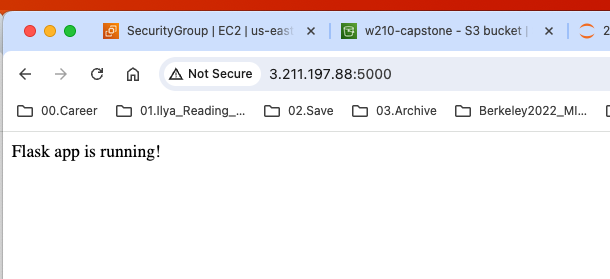

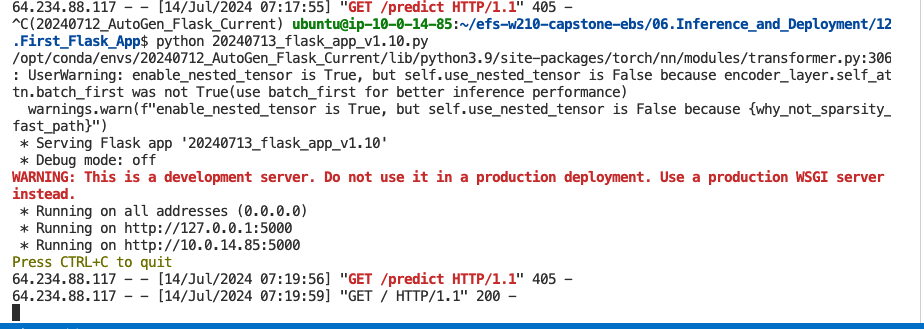

# <font color = grey> Run Inference with Flask 

### <font color = tomato> Modifying Code to run based on selected time

X_test shape: (127, 20, 56)
y_test shape: (127,)
Calculated start_index: 11616
Adjusted start_index for X_test and y_test: 1
Start index for X_test: 1
End index for X_test: 47
X_test_limited shape: (46, 20, 56)
X_test_limited sample: [[[ 4.55920000e+04 -3.64159959e-01  5.00000000e+01 ...  2.41506060e+02
    2.91421308e+02 -5.57249175e+01]
  [ 4.56030000e+04 -3.64159959e-01  5.00000000e+01 ...  2.60404889e+02
    3.66422948e+02  1.13573195e+02]
  [ 4.56120000e+04  4.94697265e+00  1.47000000e+02 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]
  ...
  [ 4.57280000e+04 -3.64159959e-01  1.10000000e+01 ...  2.25095814e+02
    2.74529356e+02 -7.26538641e+01]
  [ 4.57310000e+04 -3.64159959e-01  3.40000000e+01 ...  2.60404889e+02
    3.66422948e+02  1.13573195e+02]
  [ 4.57330000e+04 -3.64159959e-01  3.50000000e+01 ... -3.82875507e+01
   -4.59029017e+01  3.35630721e+01]]]
Response keys: dict_keys(['predictions'])
First 10 predictions: [0 1 0 1 1 0 0 0 0 0]
First 10 actual labels: [0. 0.

,Total_Seq_Start,Total_Seq_End,Source_Seq_Start,Source_Seq_End,Gap_Seq_Start,Gap_Seq_End,Prediction_Seq_Start,Prediction_Seq_End,Predicted,Actual,Seq_Num,Train_Test,time_start,time_start_int,Class,unique_events,most_frequent_event,transitions,entropy,hour_of_day,day_of_week,event_count,top_event_frequency,prev_event_count,transition_rate,high_transition_rate,prev_entropy,entropy_change,rolling_event_count,rolling_unique_event_count
0,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
1,11616,11638,11616,11635,11636,11637,11637,11638,1,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
2,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
3,11616,11638,11616,11635,11636,11637,11637,11638,1,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
4,11616,11638,11616,11635,11636,11637,11637,11638,1,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
5,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
6,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
7,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
8,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0
9,11616,11638,11616,11635,11636,11637,11637,11638,0,0.0,11616,Test,2005-11-08 16:30:00,45510,0,4,399,9,1.251989,16,1,15,35433,1.0,0.6,1,0.0,1.251989,33.0,13.0



Metrics:
                Metric      Value
0             Accuracy   0.673913
1  Precision (Class 1)   0.142857
2     Recall (Class 1)   0.400000
3             F1 Score   0.210526
4       True Positives   2.000000
5      False Positives  12.000000
6       True Negatives  29.000000
7      False Negatives   3.000000


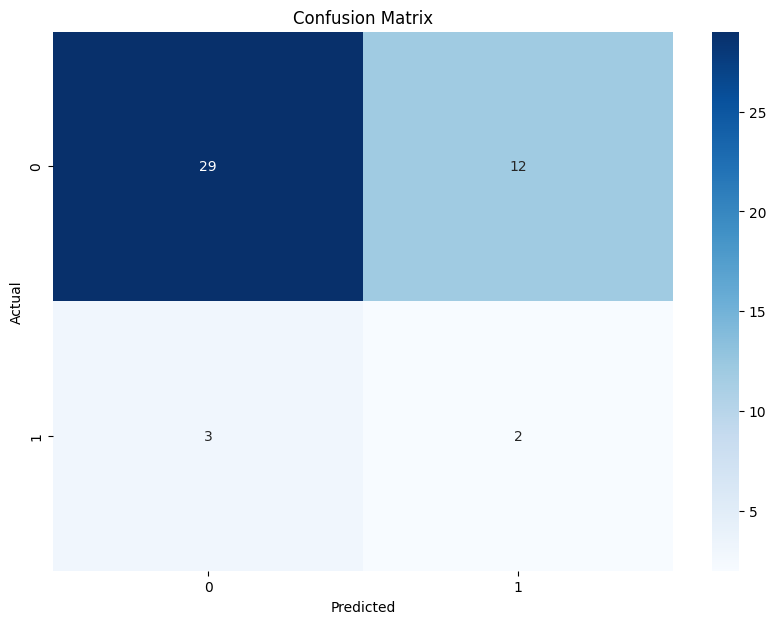

In [4]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Parameters
data_dir = '/home/ubuntu/efs-w210-capstone-ebs/04A.Local_Data_Files'
file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# Load the test data
X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define start time and number of test runs
start_time = '2005-11-08 16:30:00'
num_tests = 2

# Load the original parquet file with sequence mapping
input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_mapping_master_FINAL.parquet"
original_df = pd.read_parquet(input_file)

# Ensure Seq_Num is integer for proper merging
original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# Filter the test dataset based on the specified start time
start_index = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)].index[0]
print(f"Calculated start_index: {start_index}")

# Define the number of records for each test run (20 source + 2 gap + 1 prediction period = 23 records)
num_records_per_test = 23

# Adjust start_index for X_test and y_test by subtracting the first index where Train_Test == 'Test'
first_test_index = original_df[original_df['Train_Test'] == 'Test'].index[0]
adjusted_start_index = start_index - first_test_index
print(f"Adjusted start_index for X_test and y_test: {adjusted_start_index}")

# Calculate the correct start and end indices for X_test and y_test
start_index_x_test = adjusted_start_index
end_index_x_test = adjusted_start_index + num_tests * num_records_per_test

# Print the indices for debugging
print(f"Start index for X_test: {start_index_x_test}")
print(f"End index for X_test: {end_index_x_test}")

# Ensure the end index does not exceed the length of the test data
if end_index_x_test > len(X_test):
    end_index_x_test = len(X_test)

# Prepare the data for the specified number of test runs
X_test_limited = X_test[start_index_x_test:end_index_x_test]
y_test_limited = y_test[start_index_x_test:end_index_x_test]

# Print the shape and sample of the limited test data for debugging
print(f"X_test_limited shape: {X_test_limited.shape}")
print(f"X_test_limited sample: {X_test_limited[:1]}")

# Prepare the data for the request
data = {'X_test': X_test_limited.tolist()}

# Send a request to the server
response = requests.post('http://0.0.0.0:5000/predict', json=data)
response_data = response.json()

# Verify the response keys
print("Response keys:", response_data.keys())

# Process the response
predictions = np.array(response_data['predictions']).flatten()

# Print first 10 predictions and actual labels
print("First 10 predictions:", predictions[:10])
print("First 10 actual labels:", y_test_limited[:10])

# Create DataFrame for tracking and merging with additional information
tracking_data = []

for i in range(num_tests):
    for j in range(num_records_per_test):
        index = i * num_records_per_test + j
        total_seq_start = start_index + i * num_records_per_test
        total_seq_end = total_seq_start + num_records_per_test - 1
        source_seq_start = total_seq_start
        source_seq_end = source_seq_start + 20 - 1
        gap_seq_start = source_seq_end + 1
        gap_seq_end = gap_seq_start + 1
        prediction_seq_start = total_seq_end - 1
        prediction_seq_end = total_seq_end
        
        tracking_data.append([
            total_seq_start, total_seq_end, source_seq_start, source_seq_end,
            gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
            predictions[index], y_test_limited[index]
        ])

tracking_df = pd.DataFrame(tracking_data, columns=[
    "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
    "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
    "Predicted", "Actual"
])

# Convert Source_Seq_Start to integer for proper merging
tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

# Merge with original data
merged_df = tracking_df.merge(original_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

# Display the first 30 columns of the new DataFrame
pd.set_option('display.max_columns', 30)
print("\nEnhanced Results:")
display(merged_df.iloc[:, :30])

# Calculate metrics
conf_matrix = confusion_matrix(y_test_limited, predictions)
precision = precision_score(y_test_limited, predictions, zero_division=0)
recall = recall_score(y_test_limited, predictions, zero_division=0)
accuracy = accuracy_score(y_test_limited, predictions)
f1 = f1_score(y_test_limited, predictions, zero_division=0)
tn, fp, fn, tp = conf_matrix.ravel()

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
    'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
})

# Print metrics DataFrame
print("\nMetrics:")
print(metrics_df)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---

# <font color = pink> Model Eval from saved model (#72)
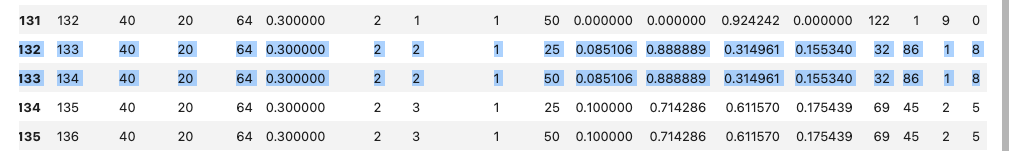

---